## Problem 2.24

In [1]:
# TODO: Add your imports
import numpy as np
import matplotlib.pyplot as plt


### 2.24 (B)

In [8]:
def target_function(x):
    # TODO: implement target function
    return x**2

In [9]:
def g_d(x1,x2 , y1, y2):

    # y = ax + b

    # slope
    a = (y2-y1)/(x2-x1)

    # intercept
    b = y1 - a*x1

    return a,b

In [10]:
def gen_data(N):
    # generate data set of size N following uniform distribution in [-1,1]
    data = np.random.uniform(-1,1,(N,2))
    return data

In [11]:
def run_numerical_experiment(training_set , test_set , y_train , y_test):
    # TODO: implement experiment    
    g_bar = (0 , 0)
    E_out = 0
    g_list = []

    for i in range(len(training_set)):
        x1 , x2 = training_set[i]
        y1 , y2 = y_train[i]
        
        slope , intercept = g_d(x1,x2 , y1, y2)
        g_list.append((slope , intercept))
        y_pred = slope * test_set + intercept
        g_bar = (g_bar[0] + slope , g_bar[1] + intercept)
        error = np.mean((y_pred - y_test)**2)
        E_out += error

    E_out /= len(training_set)
    g_bar = (g_bar[0] / len(training_set) , g_bar[1] / len(training_set))
    return E_out , g_bar , g_list
    

### 2.24 (C)

In [15]:
# TODO: Run experiment and calculate bias and variance (+ plotting)
training_size = 100000
test_size = 1000

training_set = gen_data(training_size)
test_set = gen_data(test_size)

y_train = target_function(training_set)
y_test = target_function(test_set)

E_out , g_bar , g_list = run_numerical_experiment(training_set , test_set , y_train , y_test)

# variance = E[(g_bar(x) - g(x))**2]
variance = np.mean([(g[0] * test_set + g[1] - g_bar[0] * test_set + g_bar[1])**2 for g in g_list])

# bias = E[(g_bar(x) - f(x))**2]
bias = np.mean((g_bar[0] * test_set + g_bar[1] - y_test)**2)


print("variance: " , variance)
print("bias: " , bias)
print("bias + variance: " , bias + variance)
print("Eout: " , E_out)

variance:  0.32747758634648055
bias:  0.19463136364813474
bias + variance:  0.5221089499946153
Eout:  0.5220987233960985


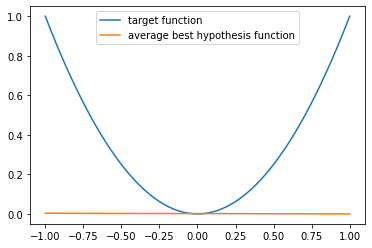

In [16]:
# plot the target function and the hypothesis function
x = np.linspace(-1,1,1000)
y = target_function(x)
plt.plot(x,y)
y = g_bar[0] * x + g_bar[1]
plt.plot(x,y)
plt.legend(['target function' , 'average best hypothesis function'])
plt.show()

### 2.24 (E)

In [18]:
# TODO: Run experiment for quadratic hypothesis
def new_g_d(y_list):
    return np.mean(y_list)

def new_run_numerical_experiment(training , test , y_train , y_test):
    E_out = 0
    g_bar = 0
    g_list = []

    for i in range(len(training)):
        y_pred = new_g_d(y_train[i])
        g_list.append(y_pred)
        g_bar += y_pred
        error = np.mean((y_pred - y_test)**2)
        E_out += error

    E_out /= len(training)
    g_bar /= len(training)

    return E_out , g_bar , g_list

def new_generate_data(N, d):

    data = np.random.uniform(-1,1,(N,d))
    data = np.sort(data , axis=1)

    return data

def plot_(y, pred):
    x = np.linspace(-1,1,1000)
    plt.plot(x,y, label='target function')
    plt.plot(x,pred * np.ones(1000), label='average best hypothesis function')
    plt.legend()
    plt.show()

variance:  0.04440200291070847
bias:  0.08924731476783081
bias + variance:  0.13364931767853927
Eout:  0.13364931767853908


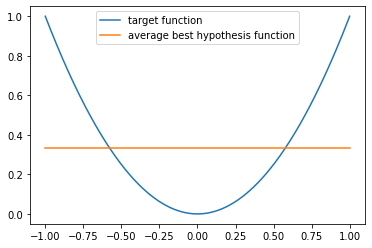

In [21]:
d  = 2
training_2 = new_generate_data(training_size , d)
test_2 = new_generate_data(test_size, d)

y_train_2 = target_function(training_2)
y_test_2 = target_function(np.linspace(-1,1,1000))

E_out_2 , g_bar_2 , g_list_2 = new_run_numerical_experiment(training_2 , test_2 , y_train_2 , y_test_2)

# variance = E[(g_bar(x) - g(x))**2]
variance_2 = np.mean([(g - g_bar_2)**2 for g in g_list_2])

# bias = E[(g_bar(x) - f(x))**2]
bias_2 = np.mean((g_bar_2 - y_test_2)**2)

print("variance: " , variance_2)
print("bias: " , bias_2)
print("bias + variance: " , bias_2 + variance_2)
print("Eout: " , E_out_2)

# plot the target function and the hypothesis function
plot_(y_test_2, g_bar_2)

variance:  0.017749422320745948
bias:  0.08924542243046528
bias + variance:  0.10699484475121122
Eout:  0.10699484475121043


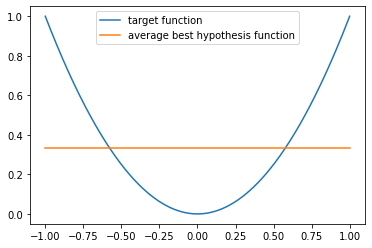

In [23]:
d  = 5
training_5 = new_generate_data(training_size , d)
test_5 = new_generate_data(test_size, d)

y_train_5 = target_function(training_5)
y_test_5 = target_function(np.linspace(-1,1,1000))

E_out_5 , g_bar_5 , g_list_5 = new_run_numerical_experiment(training_5 , test_5 , y_train_5 , y_test_5)

# variance = E[(g_bar(x) - g(x))**2]
variance_5 = np.mean([(g - g_bar_5)**2 for g in g_list_5])

# bias = E[(g_bar(x) - f(x))**2]
bias_5 = np.mean((g_bar_5 - y_test_5)**2)

print("variance: " , variance_5)
print("bias: " , bias_5)
print("bias + variance: " , bias_5 + variance_5)
print("Eout: " , E_out_5)

# plot the target function and the hypothesis function
plot_(y_test_5, g_bar_5)

variance:  0.00890166599280922
bias:  0.08924534819319166
bias + variance:  0.09814701418600089
Eout:  0.09814701418600048


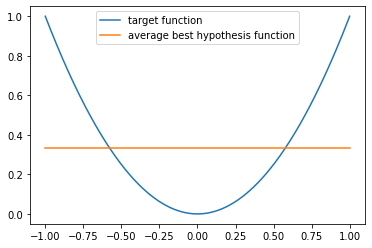

In [24]:
d  = 10
training_10 = new_generate_data(training_size , d)
test_10 = new_generate_data(test_size, d)

y_train_10 = target_function(training_10)
y_test_10 = target_function(np.linspace(-1,1,1000))

E_out_10 , g_bar_10 , g_list_10 = new_run_numerical_experiment(training_10 , test_10 , y_train_10 , y_test_10)

# variance = E[(g_bar(x) - g(x))**2]
variance_10 = np.mean([(g - g_bar_10)**2 for g in g_list_10])

# bias = E[(g_bar(x) - f(x))**2]
bias_10 = np.mean((g_bar_10 - y_test_10)**2)

print("variance: " , variance_10)
print("bias: " , bias_10)
print("bias + variance: " , bias_10 + variance_10)
print("Eout: " , E_out_10)

# plot the target function and the hypothesis function
plot_(y_test_10, g_bar_10)

variance:  0.004421269605359907
bias:  0.08924599740820742
bias + variance:  0.09366726701356733
Eout:  0.09366726701356623


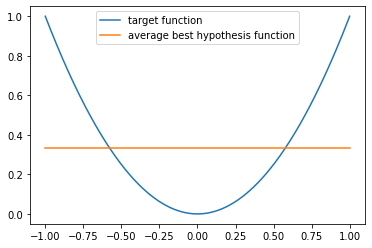

In [25]:
d  = 20
training_20 = new_generate_data(training_size , d)
test_20 = new_generate_data(test_size, d)

y_train_20 = target_function(training_20)
y_test_20 = target_function(np.linspace(-1,1,1000))

E_out_20 , g_bar_20 , g_list_20 = new_run_numerical_experiment(training_20 , test_20 , y_train_20 , y_test_20)

# variance = E[(g_bar(x) - g(x))**2]
variance_20 = np.mean([(g - g_bar_20)**2 for g in g_list_20])

# bias = E[(g_bar(x) - f(x))**2]
bias_20 = np.mean((g_bar_20 - y_test_20)**2)

print("variance: " , variance_20)
print("bias: " , bias_20)
print("bias + variance: " , bias_20 + variance_20)
print("Eout: " , E_out_20)

# plot the target function and the hypothesis function
plot_(y_test_20, g_bar_20)

In [ ]:
'''
==> The variance decreases with the increase of the data size N. 

==> The bias almost always remains the same and don't change with increasing the data size N. 

==> E_out approximatatly = bias + variance

==> The varinace is smaller than the bias 
    due to the fact that the hypothesis function is simple (not complex).

'''